In [8]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.10911101 0.12714741 0.08437234 ... 0.031489   0.00687647 0.21762468]
 [0.22792402 0.26560059 0.17624696 ... 0.06577797 0.0143644  0.45460026]
 [0.26517283 0.30900674 0.20505037 ... 0.07652782 0.01671192 0.52889396]
 ...
 [0.34221103 0.3987796  0.26462175 ... 0.09876074 0.02156708 0.6825486 ]
 [0.09636861 0.11229865 0.07451902 ... 0.0278116  0.00607341 0.19220964]
 [0.24576783 0.28639403 0.19004505 ... 0.07092762 0.01548896 0.49019018]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.15384052  0.22569124  0.04233804 ...  0.24949132  0.05392945
   0.20604122]
 [ 0.35238346  0.10789607  0.3994039  ...  0.21227758  0.12054728
   0.49573382]
 [ 0.15373128  0.2301251   0.12605651 ...  0.3355702   0.07808168
   0.67036951]
 ...
 [ 0.41513109  0.1251028   0.33571972 ...  0.15811615 -0.03780594
   0.7899765 ]
 [-0.03918636  0.15163135  0.1034342  ... -0.03998582  0.09101445
   0.04397636]
 [ 0.13987835  0.28656325  0.08039175 ...  0.04811573  0.09078959
   0.38

In [9]:
print(u)

[0.30321333 0.63338798 0.73690032 0.18698109 0.50578642 0.20384448
 0.38527    0.82909663 0.25409471 0.52231937 0.05571485 0.90562861
 0.48656804 0.83847846 0.67998455 0.62900637 0.12411498 0.603894
 0.50497631 0.13702421 0.29100873 0.8517791  0.13645674 0.40752087
 0.27629551 0.04217264 0.121483   0.82324135 0.79720589 0.46029296
 0.64880987 0.39225141 0.76700743 0.52340993 0.51550152 0.57536568
 0.63641232 0.66007162 0.42873734 0.69047256 0.37433175 0.47669157
 0.63545026 0.01613669 0.2859772  0.98079909 0.38333027 0.95098512
 0.26780292 0.68297491]


In [10]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [11]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "point_exp",
               prior_F = "point_exp",K=10)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF(use_nmf=True)
U
mycebmf.L
 

c:\Users\WD\anaconda3\envs\torch_env\lib\site-packages\sklearn\decomposition\_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


array([[6.67387843e-01, 0.00000000e+00, 1.58131216e-02, 7.05002487e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.88457817e-02,
        3.67319405e-01, 0.00000000e+00],
       [4.74073857e-01, 8.86577487e-01, 1.11961879e-01, 6.01062655e-01,
        3.35349441e-02, 1.01872601e-01, 1.26183540e-01, 3.04749813e-02,
        2.54023075e-01, 1.49085850e-01],
       [2.65814275e-01, 4.04158086e-01, 6.83094561e-02, 8.36244822e-01,
        5.27345762e-02, 4.75578219e-01, 6.78257048e-02, 0.00000000e+00,
        6.57790780e-01, 1.59549132e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.28889380e-02, 1.53855950e-01, 6.26744106e-02, 1.54900700e-01,
        1.00415483e-01, 1.20983943e-01],
       [7.08477855e-01, 1.20863849e-02, 0.00000000e+00, 2.35972181e-01,
        7.74198920e-02, 4.09035951e-01, 2.23411068e-01, 0.00000000e+00,
        4.13777441e-01, 2.05756277e-01],
       [0.00000000e+00, 0.00000000e+00, 2.19542962e-02, 0.00000000e+00,
   

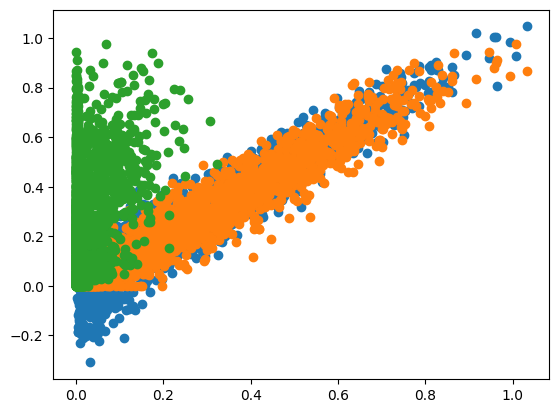

In [34]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [13]:
mycebmf.F

array([[0.11019661, 0.13317057, 1.3842906 , 0.04718314, 0.03419783,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.05720067, 0.        , 0.04667071, 0.15133701, 0.        ,
        0.        , 0.19723327, 1.230163  , 0.09321174, 0.0205009 ],
       [0.        , 0.14680664, 1.0367517 , 0.0279375 , 0.        ,
        0.        , 0.04748601, 0.3927354 , 0.        , 0.        ],
       [0.06731912, 0.01535287, 0.73462194, 0.23565924, 0.        ,
        0.40168458, 0.        , 0.8245348 , 0.        , 0.11210039],
       [0.1570884 , 0.12121245, 0.9433458 , 0.21783967, 0.2775942 ,
        0.16081995, 0.06217587, 0.        , 0.16737053, 0.        ],
       [0.16779111, 0.09460572, 0.8511121 , 0.2362988 , 0.70808804,
        0.36981937, 0.        , 0.67085004, 0.23167822, 0.0763871 ],
       [0.06885514, 0.16613108, 1.2513697 , 0.        , 0.25293884,
        0.00221008, 0.01576774, 0.54234576, 0.41851637, 0.65083444],
       [0.09855022, 0.05606388, 0.       

In [14]:
mycebmf.iter()

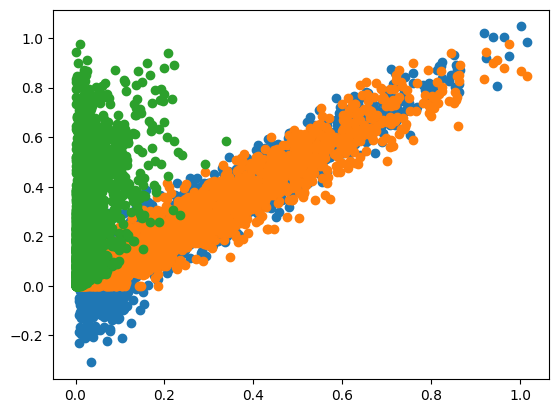

In [15]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [16]:
for i in range(40):
    mycebmf.iter()


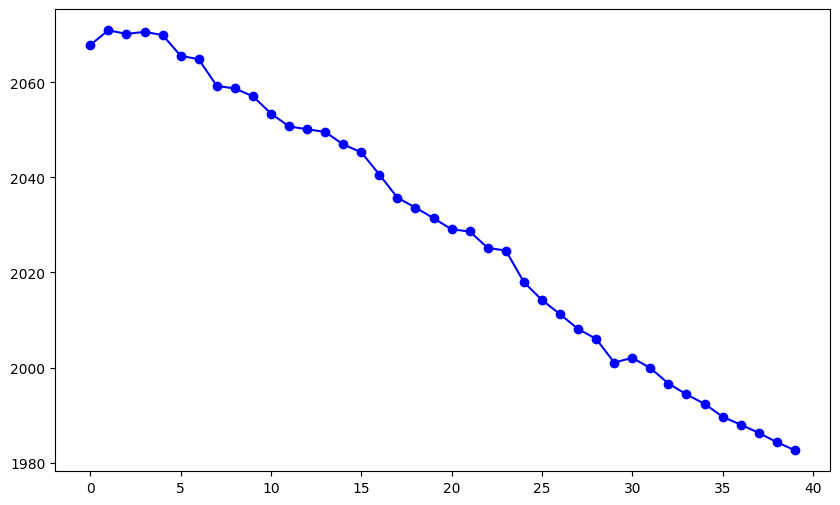

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[2:], marker='o', linestyle='-', color='b')

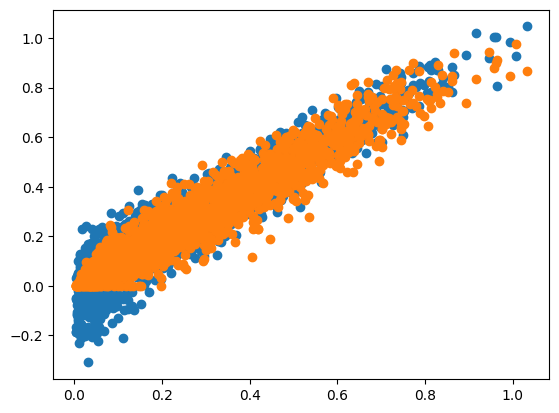

In [35]:
 
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)


[4.42114137e-01 2.07402532e-10 2.14648627e-10 2.24808846e-10
 2.38965646e-10 2.58611524e-10 2.86176566e-10 3.26731975e-10
 3.97793790e-10 3.27621981e-09 6.42176164e-06 1.03741209e-02
 4.90892639e-01 5.66052913e-02 7.38470211e-06 3.60955499e-10
 1.79909067e-10]


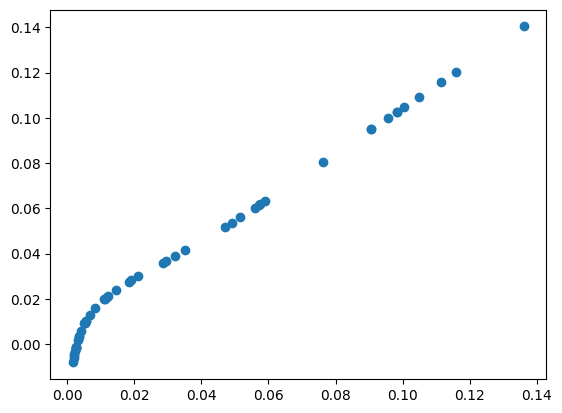

In [36]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 

ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = "exp",
                      verbose=False
                      )
 
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
print(ash_obj.pi
      )
plt.scatter(ash_obj.post_mean, lhat)

In [37]:
mycebmf.L

array([[4.52415533e-02, 2.60374648e-03, 3.77761014e-02, 1.19579270e-01,
        4.97960718e-04, 2.36890111e-02, 3.11191985e-03, 2.76678782e-02,
        8.49092379e-02, 1.68811008e-02],
       [5.35668209e-02, 9.06100422e-02, 1.16639927e-01, 8.23868811e-02,
        1.42997596e-03, 1.07002638e-01, 6.96754269e-03, 1.67297572e-02,
        1.14110850e-01, 6.70794100e-02],
       [3.88917513e-03, 4.90531139e-02, 4.18239124e-02, 1.44862056e-01,
        1.15187326e-03, 2.33382195e-01, 2.00670734e-02, 1.13067776e-02,
        1.75760403e-01, 9.65199992e-02],
       [1.63735205e-03, 2.19087442e-03, 1.00729028e-02, 1.10372202e-03,
        2.10325373e-03, 7.86010101e-02, 4.82528657e-03, 7.65359923e-02,
        2.03789808e-02, 7.20417202e-02],
       [1.03786103e-01, 5.25393663e-03, 1.69147737e-02, 5.92322787e-03,
        2.00353027e-03, 2.08647147e-01, 1.20241093e-02, 1.28244208e-02,
        1.31733730e-01, 7.22197667e-02],
       [3.50685418e-03, 5.62820258e-03, 1.50431870e-02, 3.10388650e-03,
   

In [38]:
normal_means_loglik(x=lhat , 
                                            s=  s_l,
                                            Et=ash_obj.post_mean,
                                            Et2= ash_obj.post_mean2
                                           )

np.float64(-3431.1205691256832)

In [39]:
ash_obj.log_lik


np.float64(92.54991481648834)

In [40]:
x=lhat

s=  s_l
Et=ash_obj.post_mean
Et2= ash_obj.post_mean2
print(Et2)
print(Et[12])
lhat[11] 




[0.00260375 0.09061005 0.04905311 0.00219087 0.00525394 0.0056282
 0.10487648 0.09818    0.00320181 0.00667888 0.00532824 0.1158795
 0.003493   0.01912385 0.1115501  0.03519982 0.03224455 0.01120413
 0.00254004 0.00565816 0.05889525 0.00517821 0.02845368 0.00205427
 0.00176294 0.01838331 0.05728351 0.01100083 0.05587949 0.05751992
 0.09564477 0.01194212 0.0083433  0.09058121 0.00255266 0.01223157
 0.13614994 0.0762942  0.04706002 0.00196174 0.02115253 0.00261945
 0.09827759 0.00358153 0.05150486 0.01461305 0.02942029 0.10031989
 0.00234215 0.00412553]
0.003493000325238898


np.float32(0.12015504)

In [41]:
-0.5 * np.sum(np.log(2 * np.pi * s**2) + (1 / s**2) * (Et2 - 2 * x * Et + x**2))

np.float64(-3431.1205691256832)

In [42]:
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = "exp",
                      verbose=False
                      )
print(ash_obj.log_lik)


92.54991481648834


In [43]:
ash_obj.pi

array([4.42114137e-01, 2.07402532e-10, 2.14648627e-10, 2.24808846e-10,
       2.38965646e-10, 2.58611524e-10, 2.86176566e-10, 3.26731975e-10,
       3.97793790e-10, 3.27621981e-09, 6.42176164e-06, 1.03741209e-02,
       4.90892639e-01, 5.66052913e-02, 7.38470211e-06, 3.60955499e-10,
       1.79909067e-10])

In [44]:
betahat   =lhat
sebetahat =s_l 
prior     = "exp"
print(prior)

scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True) 
print(optimal_pi)

exp
[4.42114079e-01 3.76346788e-18 3.76346788e-18 3.76346788e-18
 3.76346788e-18 2.25808073e-17 3.87637192e-16 2.32996296e-14
 4.33534188e-12 2.74529188e-09 6.42062103e-06 1.03739960e-02
 4.90893732e-01 5.66043867e-02 7.38289530e-06 1.82038189e-12
 3.76346788e-18]


[0.00260375 0.09061004 0.04905311 0.00219088 0.00525394 0.0056282
 0.10487647 0.09818    0.00320181 0.00667888 0.00532824 0.1158795
 0.003493   0.01912385 0.1115501  0.03519982 0.03224455 0.01120413
 0.00254004 0.00565816 0.05889525 0.00517822 0.02845368 0.00205427
 0.00176294 0.01838331 0.05728351 0.01100084 0.05587949 0.05751992
 0.09564477 0.01194212 0.00834331 0.09058121 0.00255266 0.01223157
 0.13614993 0.0762942  0.04706002 0.00196174 0.02115253 0.00261945
 0.09827759 0.00358153 0.05150486 0.01461305 0.02942029 0.10031989
 0.00234215 0.00412553]


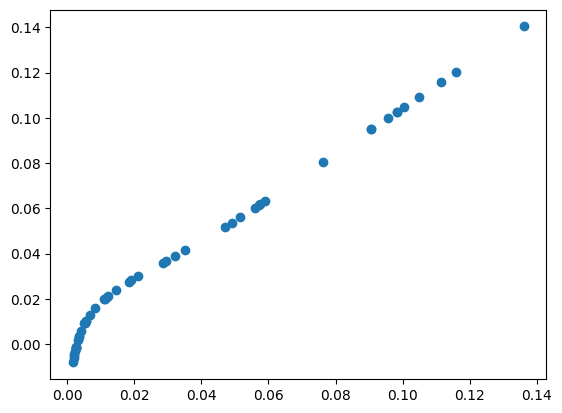

In [45]:
optimal_pi
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat= betahat ,
                        sebetahat=sebetahat ,
                                 log_pi=log_pi , 
                                 scale=scale)
plt.scatter(out.post_mean, lhat)
print(out.post_mean)


In [46]:
print(  np.sum(np.exp(L)*optimal_pi, axis=1) )

[15.39033056  1.84390669  3.98064299 14.40989561 15.28500184 15.00683658
  1.41836892  1.60409234 15.99329235 14.19185075 15.23091471  1.15921047
 16.07030333  8.07209848  1.25491432  5.23859867  5.59606446 11.17125116
 15.27655629 14.98405812  3.31386662 15.33938932  6.13266828 13.9342292
 12.58343702  8.28436642  3.41446124 11.28289423  3.5046441   3.39951291
  1.68067138 10.78329801 12.95160324  1.84488628 15.30005136 10.63824662
  0.80045314  2.40133076  4.13311937 13.55873557  7.5456908  15.41658314
  1.60121608 16.07436498  3.80200713  9.57882788  5.9860605   1.54220944
 14.84076885 15.95694962]


In [47]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
print( np.exp(L)*optimal_pi )

[[1.14958070e+01 9.65976284e-17 9.57859045e-17 9.43991182e-17
  9.20670468e-17 5.29841115e-16 8.51377199e-15 4.63943415e-13
  7.54129539e-11 4.01412404e-08 7.61006224e-05 9.65599581e-02
  3.49574933e+00 3.02109016e-01 2.90715456e-05 5.22668125e-12
  7.81123167e-18]
 [4.73745024e-08 7.50777174e-25 1.11888951e-24 2.56451064e-24
  1.52546932e-23 1.46720759e-21 4.74637929e-19 3.58558566e-16
  4.76995044e-13 1.26065768e-09 7.84407583e-06 2.36836986e-02
  1.60317180e+00 2.17014529e-01 2.87686607e-05 6.49687612e-12
  1.14167289e-17]
 [2.40935258e-02 2.77120718e-19 3.20886550e-19 4.04315722e-19
  5.84645352e-19 6.15283815e-18 2.21212928e-16 2.92385371e-14
  1.08528344e-11 1.15210571e-08 3.75281749e-05 7.16557849e-02
  3.50733375e+00 3.77479838e-01 4.25492156e-05 8.56778118e-12
  1.38830170e-17]
 [1.10872441e+01 9.18633419e-17 9.05912742e-17 8.86252084e-17
  8.56213745e-17 4.87103596e-16 7.72572679e-15 4.15329035e-13
  6.66393181e-11 3.50635558e-08 6.58341803e-05 8.28902869e-02
  2.98302620e+00

In [48]:
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)

print(L)

threshold_loglikelihood =  -300  # Example of a very small threshold
L = np.maximum(L,  (threshold_loglikelihood))
print(L)
log_lik =    np.sum(np.log(np.sum(np.exp(L)*optimal_pi, axis=1)))

[[ 3.25816970e+00  3.24521335e+00  3.23677470e+00  3.22219089e+00
   3.19717624e+00  3.15547687e+00  3.08937054e+00  2.99132513e+00
   2.85617859e+00  2.68251684e+00  2.47254160e+00  2.23086185e+00
   1.96307536e+00  1.67470145e+00  1.37059400e+00  1.05473021e+00
   7.30221815e-01]
 [-1.60489943e+01 -1.54274978e+01 -1.50285147e+01 -1.41990837e+01
  -1.24159642e+01 -9.64149459e+00 -6.70527285e+00 -4.17410073e+00
  -2.20704965e+00 -7.78253845e-01  2.00243729e-01  8.25484696e-01
   1.18351165e+00  1.34387782e+00  1.36012075e+00  1.27227516e+00
   1.10973889e+00]
 [-2.90962478e+00 -2.60864290e+00 -2.46200849e+00 -2.23090006e+00
  -1.86209069e+00 -1.30018685e+00 -5.60944115e-01  2.27050139e-01
   9.17625805e-01  1.43428901e+00  1.76557713e+00  1.93257159e+00
   1.96638374e+00  1.89743067e+00  1.75149554e+00  1.54896249e+00
   1.30532545e+00]
 [ 3.22198260e+00  3.19496122e+00  3.18101706e+00  3.15907550e+00
   3.12459411e+00  3.07137651e+00  2.99224135e+00  2.88063360e+00
   2.73249429e+00  

In [49]:
np.exp(L[1,]) 

array([1.07154476e-07, 1.99490788e-07, 2.97302793e-07, 6.81422220e-07,
       4.05336080e-06, 6.49758697e-05, 1.22443857e-03, 1.53890243e-02,
       1.10024782e-01, 4.59207159e-01, 1.22170049e+00, 2.28298705e+00,
       3.26582251e+00, 3.83388183e+00, 3.89666378e+00, 3.56896329e+00,
       3.03356618e+00])

In [50]:
i=6
print(scale)
print(betahat[i]/sebetahat[i])
convolved_logpdf_exp(betahat=betahat[i],
                                         sebetahat=sebetahat[i],  
                                         scale=scale)

[0.         0.00116345 0.00164537 0.0023269  0.00329073 0.0046538
 0.00658146 0.00930759 0.01316293 0.01861519 0.02632585 0.03723038
 0.0526517  0.07446075 0.10530341 0.14892151 0.21060681]
7.1480527


array([-22.28451328, -21.52426732, -20.96958407, -19.64056235,
       -16.69369264, -12.70242702,  -8.87077836,  -5.70537631,
        -3.28982646,  -1.54389279,  -0.34114477,   0.44266521,
         0.91281739,   1.15246808,   1.22477362,   1.17657029,
         1.04206532])